# Importing data from csv file into mysql , with the help of python script; the data had more than 1 lakh rows


In [1]:
'''
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='123',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/HP/Desktop/Data_Analyst/SQL + python/project 2'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()
'''

'\nimport pandas as pd\nimport mysql.connector\nimport os\n\n# List of CSV files and their corresponding table names\ncsv_files = [\n    (\'customers.csv\', \'customers\'),\n    (\'orders.csv\', \'orders\'),\n    (\'sellers.csv\', \'sellers\'),\n    (\'products.csv\', \'products\'),\n    (\'geolocation.csv\', \'geolocation\'),\n    (\'payments.csv\', \'payments\'),\n    (\'order_items.csv\',\'order_items\')# Added payments.csv for specific handling\n]\n\n# Connect to the MySQL database\nconn = mysql.connector.connect(\n    host=\'localhost\',\n    user=\'root\',\n    password=\'123\',\n    database=\'ecommerce\'\n)\ncursor = conn.cursor()\n\n# Folder containing the CSV files\nfolder_path = \'C:/Users/HP/Desktop/Data_Analyst/SQL + python/project 2\'\n\ndef get_sql_type(dtype):\n    if pd.api.types.is_integer_dtype(dtype):\n        return \'INT\'\n    elif pd.api.types.is_float_dtype(dtype):\n        return \'FLOAT\'\n    elif pd.api.types.is_bool_dtype(dtype):\n        return \'BOOLEAN\

In [2]:
#importing libraries and connecting to mysql

import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host ='localhost',
                             username = 'root',
                              password = '123',
                              database= 'ecommerce')
cur =db.cursor()

# 1. List all unique cities where customers are located. 


In [3]:
query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# 2 Count the number of orders placed in 2017.

In [4]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp)= 2017 """

cur.execute(query)

data = cur.fetchall()

"total order in 2017 are" ,data[0] [0]

('total order in 2017 are', 45101)

# 3  Find the total sales per category.

In [5]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# 4. Calculate the percentage of orders that were paid in installments.

In [6]:
query = """ select (sum(case when payment_installments>=1 then 1 else 0 end))/count(*)*100 from payments
"""   

cur.execute(query)

data = cur.fetchall()
"the percentage of orders that were paid in installments is ", data[0][0]

('the percentage of orders that were paid in installments is ',
 Decimal('99.9981'))

# 5. Count the number of customers from each state. 

In [7]:
query = """ select count(customer_id), customer_state
from customers 
group by customer_state
"""   

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Count", 'State'])  #converting into the table using pandas
df =df.sort_values(by="Count", ascending =False)
df


,Count,State
0,41746,SP
4,12852,RJ
2,11635,MG
5,5466,RS
3,5045,PR
1,3637,SC
9,3380,BA
13,2140,DF
8,2033,ES
7,2020,GO


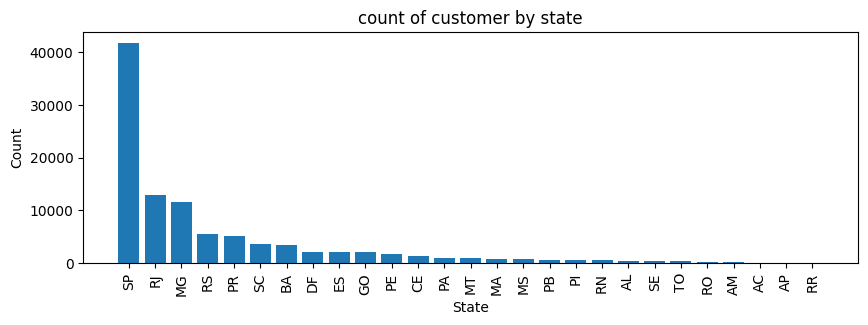

In [8]:
plt.figure(figsize =(10,3)) # figsize= (width, height)
plt.bar(df["State"], df["Count"])
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Count")
plt.title("count of customer by state")
plt.show()

# 6. Calculate the number of orders per month in 2018.

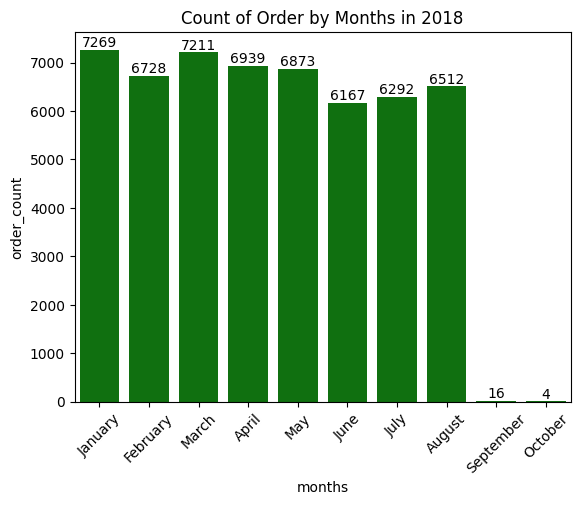

,months,order_count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


In [9]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year (order_purchase_timestamp) = 2018
group by months
"""   

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns= ["months","order_count"])
o = ["January", "February","March", "April","May","June","July","August","September","October"] # for order
ax= sns.barplot(x= df["months"], y= df ["order_count"], data = df , order = o, color = "green")  # plotting
plt.xticks(rotation=45)      # rotation of labels at x axis
ax.bar_label(ax.containers[0])    # labeling so that values are also visible on bars
plt.title("Count of Order by Months in 2018")  # showing title

plt.show()
df

# 7. Find the average number of products per order, grouped by customer city.

In [10]:
query = """ with count_per_order as 
(select orders.order_id , orders.customer_id, count(order_items.order_id) as oc
from orders join order_items 
on orders.order_id = order_items.order_id
group by orders.order_id , orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc), 2) as average 
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average desc ;   
"""    
# used multiple joins and cte, wrote the query in sql 

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns = ["City", "Average"])  # creating the data frame
#ax= sns.barplot(x= df["City"], y= df ["Average"], data = df , color = "blue")  # plotting
#plt.xticks(rotation=45)      # rotation of labels at x axis
#ax.bar_label(ax.containers[0])    # labeling so that values are also visible on bars
#plt.title("Avg order by Customer city")  # showing title
#plt.show()

# as there were more than 4000 unique cities


# 8.Calculate the percentage of total revenue contributed by each product category.

In [11]:
query = """  select upper(products.product_category) category, 
round((sum(payments.payment_value) / (select sum(payment_value)from payments) )*100,2) as sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
order by sales_percentage desc;
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns =["Category", "Sales_Percentage"])
df.head(10)

,Category,Sales_Percentage
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


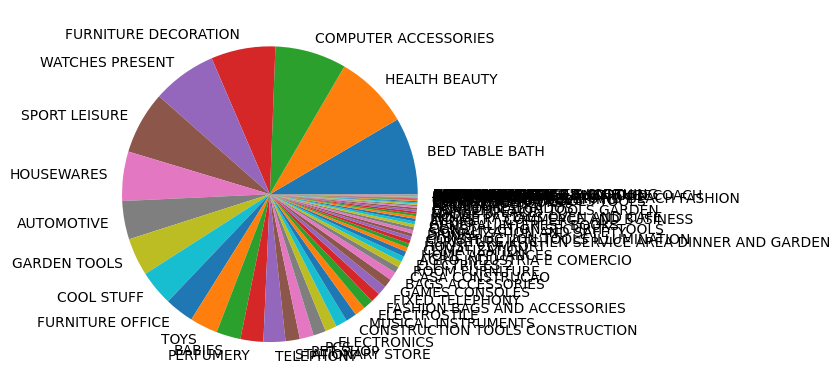

In [12]:
plt.pie(df["Sales_Percentage"], labels= df["Category"])
plt.show()

# this is because we are having a lot of product categories

# 9. Identify the correlation between product price and the number of times a product has been purchased.

In [13]:
query = """  select Upper(products.product_category), count(order_items.product_id), round(avg(order_items.price),2)
from products  join order_items
on products.product_id = order_items.product_id
group by products.product_category;

"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns =["Product_Category","Count_of_Orders","Price"])
df

,Product_Category,Count_of_Orders,Price
0,HEALTH BEAUTY,9670,130.16
1,SPORT LEISURE,8641,114.34
2,COOL STUFF,3796,167.36
3,COMPUTER ACCESSORIES,7827,116.51
4,WATCHES PRESENT,5991,201.14
...,...,...,...
69,FLOWERS,33,33.64
70,KITCHEN PORTABLE AND FOOD COACH,15,264.57
71,HOUSE COMFORT 2,30,25.34
72,CITTE AND UPHACK FURNITURE,38,114.95


In [14]:
import numpy as np
arr1 = df["Count_of_Orders"]
arr2  = df ["Price"]
np.corrcoef([arr1, arr2])          # co-relation is between -1 to 1 , where -1 : inversely prop, 0 : netutral (no such significant coorelation), 1: direct proportion

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# 10. Calculate the total revenue generated by each seller, and rank them by revenue.

In [15]:
query = """  select * , dense_rank() over (order by revenue desc ) as rn from   

(SELECT   order_items.seller_id, round(sum(payments.payment_value),2) as revenue
from order_items join payments
on order_items.order_id= payments.order_id
group by  order_items.seller_id) as a 



"""

# ranking query, also using sub query

cur.execute(query)

data = cur.fetchall()

df= pd.DataFrame(data, columns=["Seller_id", "Revenue","Rank"])
df


,Seller_id,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,4a3ca9315b744ce9f8e9374361493884,301245.27,3
3,1f50f920176fa81dab994f9023523100,290253.42,4
4,53243585a1d6dc2643021fd1853d8905,284903.08,5
...,...,...,...
3090,ad14615bdd492b01b0d97922e87cb87f,19.21,3076
3091,702835e4b785b67a084280efca355756,18.56,3077
3092,4965a7002cca77301c82d3f91b82e1a9,16.36,3078
3093,77128dec4bec4878c37ab7d6169d6f26,15.22,3079


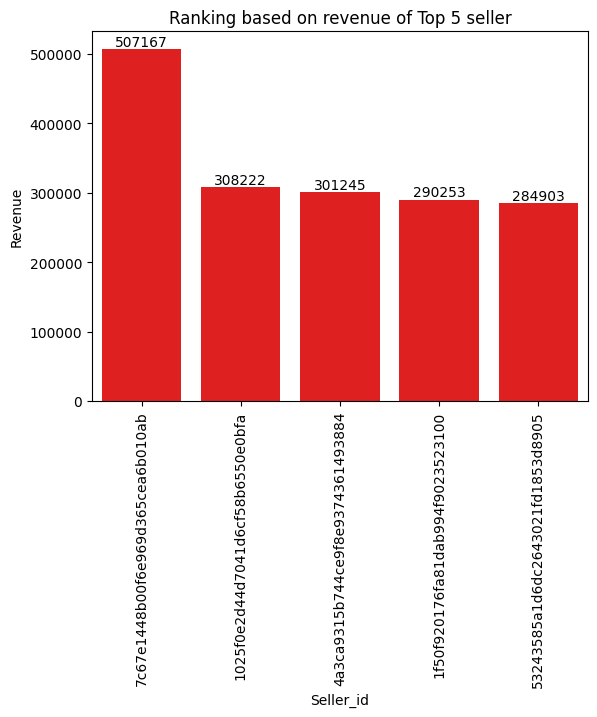

In [16]:
ax=sns.barplot(x ="Seller_id", y= "Revenue", data =df.head(5) , color = "red")
plt.xticks(rotation =90)
ax.bar_label(ax.containers[0])    # labeling so that values are also visible on bars
plt.title("Ranking based on revenue of Top 5 seller")  # showing title
plt.show()

# 11. Calculate the moving average of order values for each customer over their order history.

In [17]:
query = """  select customer_id, order_purchase_timestamp, payment,
avg (payment) over (partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as moving_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
from payments join orders 
on payments.order_id = orders.order_id) as a



"""

# ranking query, also using sub query

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["Customer_id","Timestamp","Price","Moving_Avg"])
df

,Customer_id,Timestamp,Price,Moving_Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# 12. Calculate the cumulative sales per month for each year.

In [18]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# 13. Calculate the year-over-year growth rate of total sales.

In [19]:
query = """ with a as (select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years )

select years , round(((payment - lag(payment,1) over(order by years))/lag(payment,1) over(order by years) )*100,2)  from a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["years","yoy % growth",])
df

# year on year growth : current price - previous price/ previous price
# lag (column, 1(lag by 1))
# important

,years,yoy % growth
0,2016,NaN
1,2017,12112.7
2,2018,20.0


# 14. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [20]:
query = """ with a as (select customers.customer_id, min(orders.order_purchase_timestamp) as first_order
from customers join orders on
customers.customer_id = orders.customer_id
group by customers.customer_id),

 b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) as next_order
from a join orders
on orders.customer_id =a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order, interval 6 month)
group by a.customer_id)

select 100*(count( distinct a.customer_id)/ count( distinct b.customer_id))
from a left join b on
a.customer_id =b.customer_id;
"""
cur.execute(query)
data = cur.fetchall()
#df = pd.DataFrame(data, columns=["years","yoy % growth",])
data 

# since as per our data there was no repeat customers, (used 2 sub queries for this problem)

[(None,)]

# 15. Identify the top 3 customers who spent the most money en each year

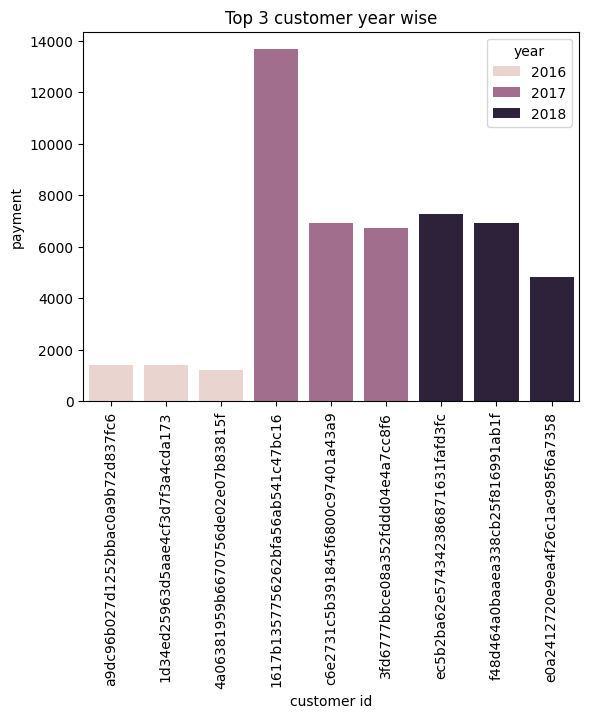

In [21]:
query = """select years, customer_id, d_rank, payment
from 
(select year(orders.order_purchase_timestamp) as years,
orders.customer_id,
sum(payments.payment_value) as payment,
dense_rank () over( partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) as d_rank
from payments join orders on
payments.order_id= orders.order_id
group by orders.order_purchase_timestamp,
orders.customer_id) as a

where d_rank <=3;


"""
# firstly sorted values on the basis of the sum of values of purchase made by customer in each year, then ranked it , further making is as a subquery found the top 3 rank , also ranking was done over partition on years basis too

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns= ["year","customer id","rank","payment"])

df
ax= sns.barplot(x= "customer id", y = "payment", data = df, hue= "year")
plt.xticks(rotation = 90)
plt.title("Top 3 customer year wise")


plt.show()

# plotting a bar graph using seaborn